In [1]:
from os import chdir; chdir('../')
from lib.app import Q
from lib.helpers.database_helper import pull_actions
from lib.helpers.database_helper import pull_and_shape_batch
from lib.helpers.database_helper import pull_training_and_test_sets
from lib.helpers.pipeline_helper import initialize_training_session
from lib.helpers.pipeline_helper import prepare_plot_of_loss_function
from lib.helpers.pipeline_helper import train_via_random_search
from lib.helpers.redis_helper import get_best_loss, get_weights_matrix, set_best_loss, set_weights_matrix
from lib.helpers.redis_helper import get_training_count, init_training_count
from lib.nn.functions import measure_accuracy, predict, random_matrix
from numpy import mean

It is of note that we will be doing the training via distributed processing. As such, we can not store the `best_loss` and `weights_matrix` in memory. Instead, we store the values in Redis. We have written a few methods to handle the storage and retrie    val of these values.

- `read_best_loss`
- `read_weights_matrix`
- `write_best_loss`
- `write_weights_matrix`

In [2]:
training_set, test_set = pull_training_and_test_sets()

## Random Search

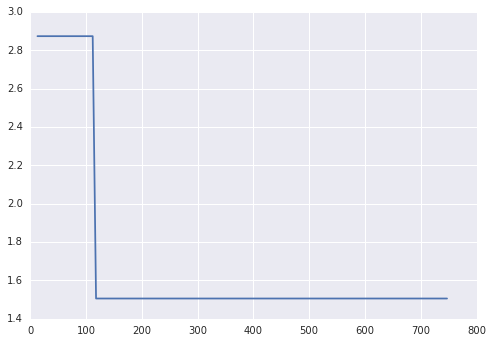

In [3]:
initialize_training_session()

for i in range(int(len(training_set)/100)):
    Q.enqueue(train_via_random_search,
              action_ids=training_set[i*100:(i+1)*100],
              gamma=0.001)

training_counts, loss_values = prepare_plot_of_loss_function()    

In [4]:
weights_matrix = get_weights_matrix()
features, outcomes = pull_and_shape_batch(action_ids=test_set)
measure_accuracy(weights_matrix, features, outcomes)

0.76213333333333333